### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the IBM Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one prototype benchmark program.

In [1]:
min_qubits=4
max_qubits=8
max_circuits=1
num_shots=5000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre' }
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"

# # *** Use these settings for better results
# min_qubits=4
# max_qubits=10
# max_circuits=2
# num_shots=50000

In [2]:
# Custom optimization options can be specified in this cell (below is an example)

# # Add Qiskit pass manager as a custom 'transformer' method
# import _common.transformers.qiskit_passmgr as qiskit_passmgr
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre', "transformer": qiskit_passmgr.do_transform }

# # Example of TrueQ Randomized Compilation
# import _common.transformers.trueq_rc as trueq_rc
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre', "transformer": trueq_rc.local_rc } 

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options = { "noise_model": custom_qiskit_noise_model.my_noise_model() }


### Maxcut - Method 1

Exception Unrecognised argument(s): encoding occured while configuring logger: bypassing logger config to prevent data loss
MaxCut Benchmark Program - Qiskit
... execution starting at Sep 25, 2022 07:41:59 UTC
************
Executing [1] circuits for num_qubits = 4
************
Executing [1] circuits for num_qubits = 6
************
Executing [1] circuits for num_qubits = 8
************
Average Depth, ξ (xi) for the 4 qubit group = 21, 0.462
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 22, 0.4, 12.0
Average Creation Time for the 4 qubit group = 0.781 secs
Average Elapsed Time for the 4 qubit group = 0.188 secs
Average Execution Time for the 4 qubit group = 0.012 secs
Average Fidelity for the 4 qubit group = 0.999
Average Hellinger Fidelity for the 4 qubit group = 0.999

************
Average Depth, ξ (xi) for the 6 qubit group = 18, 0.462
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 19, 0.4, 18.0
Average Creation Time for t

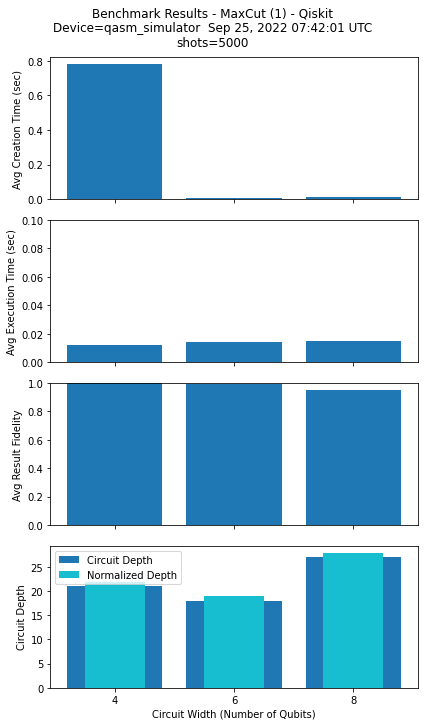

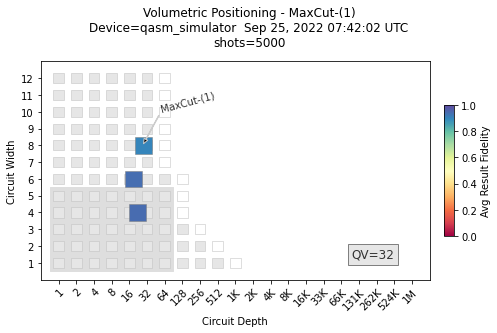

In [3]:
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=1, rounds=1,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Maxcut - Method 2 - Degree 3 - Approximation Ratio as Objective Function

MaxCut Benchmark Program - Qiskit
... execution starting at Sep 25, 2022 07:42:04 UTC
************
Executing [1] restarts for num_qubits = 4
************
Average Depth, ξ (xi) for the 4 qubit group = 40, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 41, 0.462, 24.0
Average Creation Time for the 4 qubit group = 0.001 secs
Average Elapsed Time for the 4 qubit group = 0.056 secs
Average Execution Time for the 4 qubit group = 0.01 secs
Average Fidelity for the 4 qubit group = 1.0
Average Hellinger Fidelity for the 4 qubit group = 1.0

************
Executing [1] restarts for num_qubits = 6
************
Average Depth, ξ (xi) for the 6 qubit group = 34, 0.5
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 35, 0.462, 36.0
Average Creation Time for the 6 qubit group = 0.001 secs
Average Elapsed Time for the 6 qubit group = 0.082 secs
Average Execution Time for the 6 qubit group = 0.014 secs
Average Fidelity for the 6 qubit group =

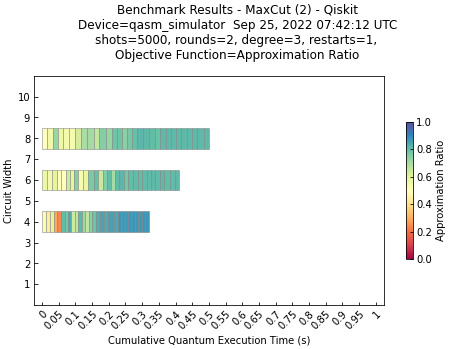

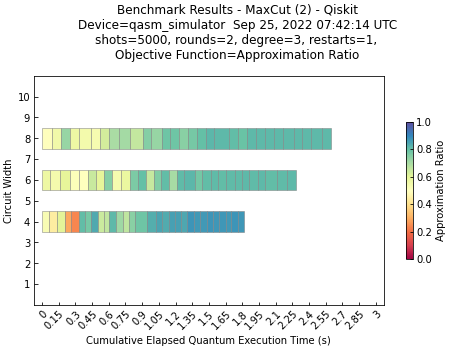

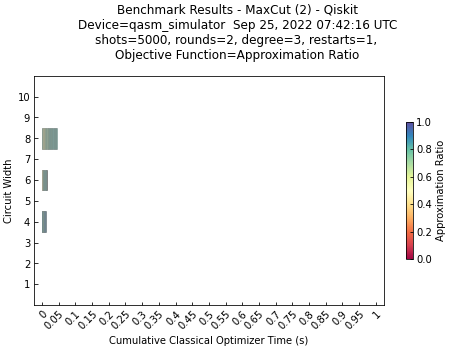

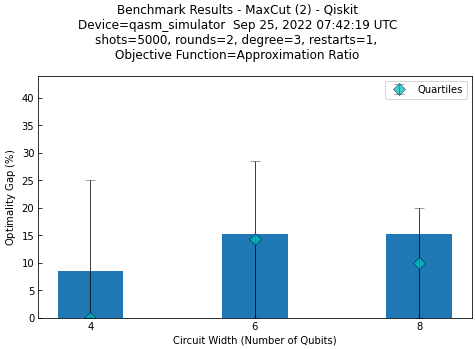

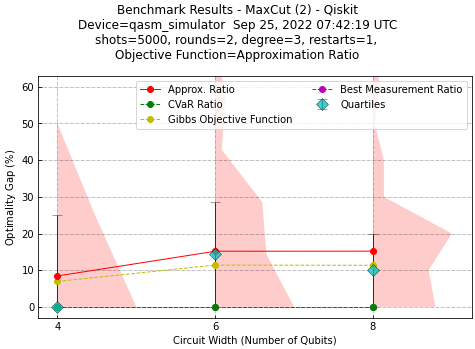

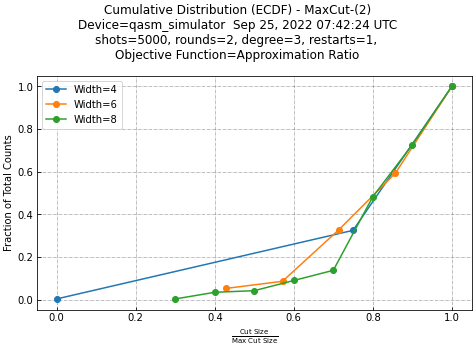

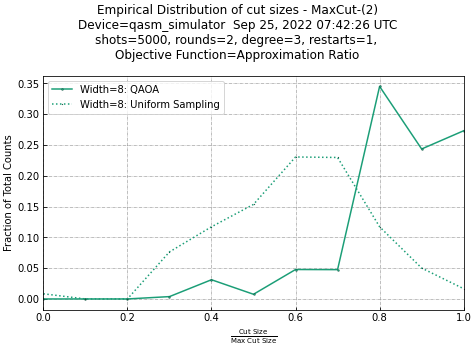

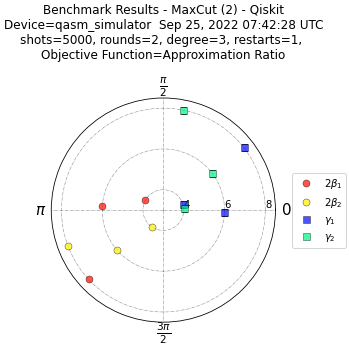

In [4]:
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

objective_func_type = 'approx_ratio'
score_metric=[objective_func_type]
x_metric=['cumulative_exec_time', 'cumulative_elapsed_time', 'cumulative_opt_exec_time']

# Note: the plots produced by this benchmark only use the last of the problems at each width

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, rounds=2, degree=3, do_fidelities=False, parameterized=False,
    score_metric=score_metric, x_metric=x_metric, 
    objective_func_type = objective_func_type,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Maxcut - Method 2 - Degree 3 - CVaR Objective Function

In [ ]:
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

objective_func_type = 'cvar_ratio'
score_metric=[objective_func_type]
x_metric=['cumulative_exec_time']

# Note: the plots produced by this benchmark only use the last of the problems at each width

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, rounds=2, degree=3, alpha = 0.1,
    objective_func_type = objective_func_type, do_fidelities = False,
    score_metric=score_metric, x_metric=x_metric, num_x_bins=15, max_iter=30,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Maxcut - Method 2 - Degree 3 - Gibbs Objective function

In [ ]:
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

objective_func_type = 'gibbs_ratio'
score_metric=[objective_func_type] #, 'fidelity'
x_metric=['cumulative_exec_time'] #, , 'cumulative_create_time' 'cumulative_opt_exec_time'

# Note: the plots produced by this benchmark only use the last of the problems at each width

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, rounds=2, degree=3, eta=0.5,
    score_metric=score_metric, x_metric=x_metric, num_x_bins=15, max_iter=30,
    objective_func_type = objective_func_type, do_fidelities = False,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Maxcut - Method 2 - Degree -3

In [ ]:
import sys
sys.path.insert(1, "maxcut/qiskit")
import maxcut_benchmark

# set noise to None for testing
import execute
execute.set_noise_model(None)

score_metric=['approx_ratio', 'fidelity']
x_metric=['cumulative_create_time', 'cumulative_exec_time', 'cumulative_opt_exec_time']

# Note: the plots produced by this benchmark only use the last of the problems at each width

maxcut_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, rounds=1, degree=-3,
    score_metric=score_metric, x_metric=x_metric, num_x_bins=15, max_iter=30,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Expected Measurement Distribution Example

The next cell is an auto-generated circuit with beta and gamma set to the optimal parameters (in terms of pi)


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

beta = 0.08
gamma = -0.094
cycle_time = 0

qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr, cr, name="main")
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[3])
qc.cx(qr[0], qr[1])
qc.rz(2*3.14159*gamma, qr[1])
qc.cx(qr[0], qr[1])
qc.cx(qr[0], qr[3])
qc.rz(2*3.14159*gamma, qr[3])
qc.cx(qr[0], qr[3])
qc.cx(qr[0], qr[2])
qc.rz(2*3.14159*gamma, qr[2])
qc.cx(qr[0], qr[2])
qc.cx(qr[1], qr[2])
qc.rz(2*3.14159*gamma, qr[2])
qc.cx(qr[1], qr[2])
qc.cx(qr[1], qr[3])
qc.rz(2*3.14159*gamma, qr[3])
qc.cx(qr[1], qr[3])
qc.cx(qr[2], qr[3])
qc.rz(2*3.14159*gamma, qr[3])
qc.cx(qr[2], qr[3])
qc.rx(2*3.14159*beta, qr[0])
qc.rx(2*3.14159*beta, qr[1])
qc.rx(2*3.14159*beta, qr[2])
qc.rx(2*3.14159*beta, qr[3])
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])
qc.measure(qr[2], cr[2])
qc.measure(qr[3], cr[3])

from qiskit import execute, Aer
backend = Aer.get_backend("qasm_simulator")  # Use Aer qasm_simulator

job = execute(qc, backend, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print("Total counts are:", counts)

# Draw the circuit
print(qc)

# Plot a histogram
from qiskit.visualization import plot_histogram
plot_histogram(counts)
